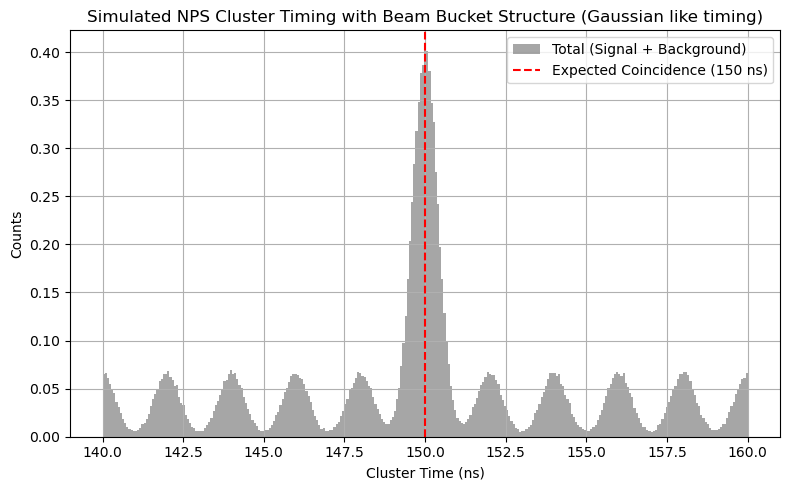

In [38]:
# Gaussian

import numpy as np
import matplotlib.pyplot as plt

# === Parameters ===
beam_bucket_spacing = 2.0        # ns
n_buckets = 200                  # Simulate +/- 200 buckets (~400 ns window)
true_peak_time = 150.0           # ns, main coincidence
timing_resolution = 0.4          # ns (Gaussian sigma)
n_true_events = 80000             # Number of true coincidences
n_bg_per_bucket = 16000             # Background events per beam bucket

# === Simulate true coincidences ===
true_times = np.random.normal(loc=true_peak_time, scale=timing_resolution, size=n_true_events)

# === Simulate background ===
bg_times = []
for i in range(-n_buckets, n_buckets + 1):
    t_bucket = true_peak_time + i * beam_bucket_spacing
    bg_cluster_times = np.random.normal(loc=t_bucket, scale=timing_resolution, size=n_bg_per_bucket)
    bg_times.extend(bg_cluster_times)

bg_times = np.array(bg_times)

# === Combine signal and background ===
all_cluster_times = np.concatenate([true_times, bg_times])

# === Plot histogram ===
plt.figure(figsize=(8, 5))
bins = np.linspace(140, 160, 300)
plt.hist(all_cluster_times, bins=bins, density=True, color='gray', alpha=0.7, label='Total (Signal + Background)')
plt.axvline(true_peak_time, color='red', linestyle='--', label='Expected Coincidence (150 ns)')
plt.xlabel("Cluster Time (ns)")
plt.ylabel("Counts")
plt.title("Simulated NPS Cluster Timing with Beam Bucket Structure (Gaussian like timing)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


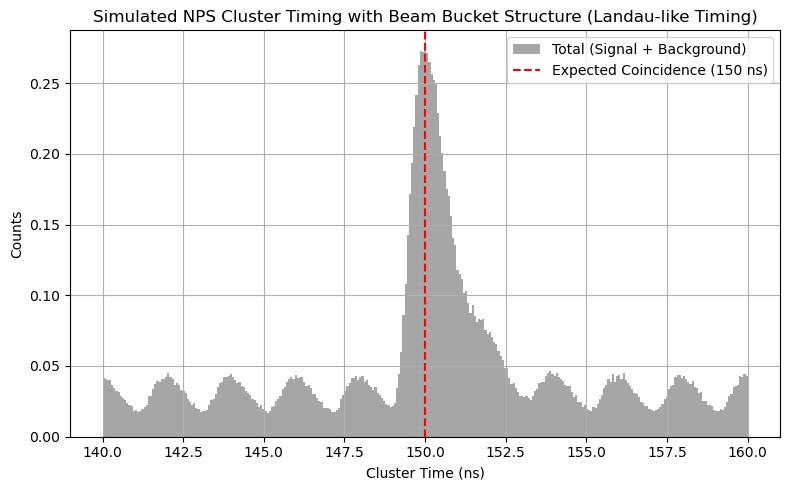

In [50]:
# Landau

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moyal

# === Parameters ===
beam_bucket_spacing = 2.0        # ns
n_buckets = 200                  # Simulate +/- 200 buckets (~400 ns window)
true_peak_time = 150.0           # ns, main coincidence
timing_resolution = 0.4          # ns (Gaussian sigma)
n_true_events = 100000             # Number of true coincidences
n_bg_per_bucket = 16000             # Background events per beam bucket

# === Simulate true coincidences (Moyal ≈ Landau) ===
true_times = moyal.rvs(loc=true_peak_time, scale=timing_resolution, size=n_true_events)

# === Simulate background ===
bg_times = []
for i in range(-n_buckets, n_buckets + 1):
    t_bucket = true_peak_time + i * beam_bucket_spacing
    bg_cluster_times = moyal.rvs(loc=t_bucket, scale=timing_resolution, size=n_bg_per_bucket)
    bg_times.extend(bg_cluster_times)

bg_times = np.array(bg_times)

# === Combine signal and background ===
all_cluster_times = np.concatenate([true_times, bg_times])

# === Plot histogram ===
plt.figure(figsize=(8,5))
bins = np.linspace(140, 160, 300)
plt.hist(all_cluster_times, bins=bins, density=True, color='gray', alpha=0.7, label='Total (Signal + Background)')
plt.axvline(true_peak_time, color='red', linestyle='--', label='Expected Coincidence (150 ns)')
plt.xlabel("Cluster Time (ns)")
plt.ylabel("Counts")
plt.title("Simulated NPS Cluster Timing with Beam Bucket Structure (Landau-like Timing)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


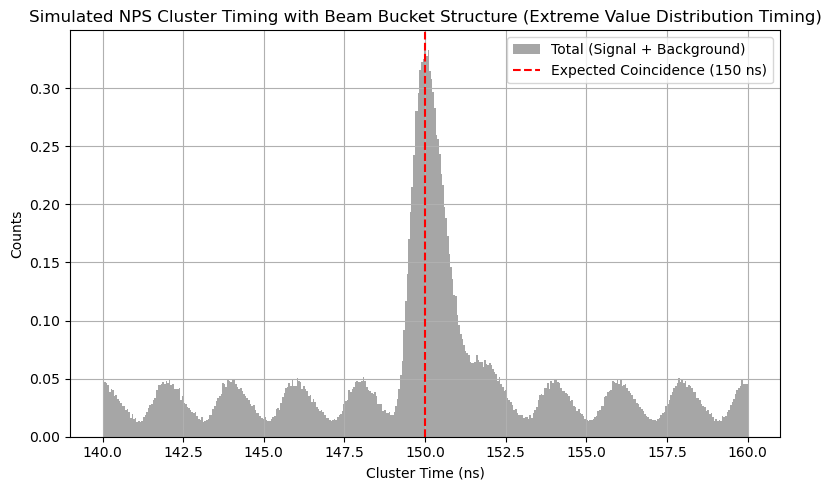

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

# === Parameters ===
beam_bucket_spacing = 2.0        # ns
n_buckets = 200                  # Simulate +/- 200 buckets (~400 ns window)
true_peak_time = 150.0           # ns, main coincidence
n_true_events = 100000            # Number of true coincidences
n_bg_per_bucket = 16000          # Background events per beam bucket

# === Gumbel Distribution Parameters ===
loc = 0.0                        # mean offset for timing jitter (will shift to t_peak)
scale = 0.5                      # controls timing spread and tail length

def gumbel_samples(t_center, size):
    """
    Generate cluster times from a Gumbel (Extreme Value) distribution centered at t_center.
    """
    return t_center + gumbel_r.rvs(loc=loc, scale=scale, size=size)

# === Simulate true coincidences ===
true_times = gumbel_samples(true_peak_time, size=n_true_events)

# === Simulate beam bucket background ===
bg_times = []
for i in range(-n_buckets, n_buckets + 1):
    t_bucket = true_peak_time + i * beam_bucket_spacing
    bg_cluster_times = gumbel_samples(t_bucket, size=n_bg_per_bucket)
    bg_times.extend(bg_cluster_times)

bg_times = np.array(bg_times)

# === Combine signal and background ===
all_cluster_times = np.concatenate([true_times, bg_times])

# === Plot histogram ===
plt.figure(figsize=(8, 5))
bins = np.linspace(140, 160, 400)
plt.hist(all_cluster_times, bins=bins, density=True, color='gray', alpha=0.7, label='Total (Signal + Background)')
plt.axvline(true_peak_time, color='red', linestyle='--', label='Expected Coincidence (150 ns)')
plt.xlabel("Cluster Time (ns)")
plt.ylabel("Counts")
plt.title("Simulated NPS Cluster Timing with Beam Bucket Structure (Extreme Value Distribution Timing)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
